In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [296]:
bd = pd.read_csv("C:/Users/PC/Downloads/Pune_data.csv")

In [297]:
#Description brèves des variables quantitatives (min,max,mean,count)
bd.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [298]:
#Aperçu des premières lignes du jeu de données
bd.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [299]:
#Aperçu des dernières lignes du jeu de données

bd.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


In [300]:
#Conversion de la variable de l'air des terrains en float
bd['total_sqft'] = pd.to_numeric(bd['total_sqft'], errors='coerce').astype('float64')
bd = bd.dropna(subset=['total_sqft']).reset_index(drop=True)

In [301]:
bd.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft       float64
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [302]:
bd["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13068    3453.0
13069    3600.0
13070    1141.0
13071    4689.0
13072     550.0
Name: total_sqft, Length: 13073, dtype: float64

In [303]:
#Verification de l'existance de valeurs manquantes
bd.isna().sum()

area_type           0
availability        0
size                8
society          5472
total_sqft          0
bath               16
balcony           548
price               0
site_location       1
dtype: int64

In [304]:
#Supression des NA dans toutes les colonnes où il en existe
""""reset.index(drop= True) sert a reinitialiser les index au lieu que malgré la supression
des NA les index restent les mêmes on les reinitialise pour la propreté de la colonne"""
  
bd = bd.dropna(subset=['size']).reset_index(drop=True)
bd = bd.dropna(subset=['bath']).reset_index(drop=True)
bd = bd.dropna(subset=['balcony']).reset_index(drop=True)
bd = bd.dropna(subset=['site_location']).reset_index(drop=True)
bd = bd.dropna(subset=['society']).reset_index(drop=True)

In [305]:
bd["site_location"].describe()

count              7337
unique               97
top       Koregaon Park
freq                 91
Name: site_location, dtype: object

In [306]:
#description des nouvelles données incluant "total_sqft" 
bd.describe()

,total_sqft,bath,balcony,price
count,7337.000000,7337.000000,7337.000000,7337.000000
mean,1505.167907,2.454682,1.662805,96.882336
std,930.778553,0.861700,0.753380,105.684258
min,11.000000,1.000000,0.000000,8.000000
25%,1120.000000,2.000000,1.000000,50.000000
50%,1310.000000,2.000000,2.000000,70.000000
75%,1655.000000,3.000000,2.000000,105.000000
max,36000.000000,9.000000,3.000000,2700.000000


In [307]:
#Nouvelle verification des valeurs nulles
bd.isna().sum()

area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

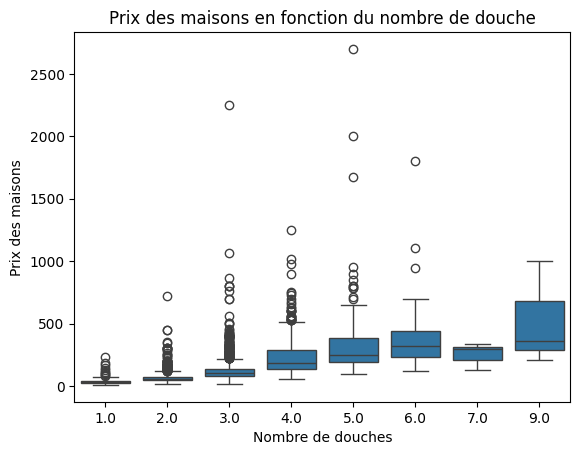

In [308]:
sns.boxplot(y="price",x="bath",data = bd)
plt.xlabel("Nombre de douches")
plt.ylabel("Prix des maisons")
plt.title("Prix des maisons en fonction du nombre de douche")
plt.show()

D'après ce qui précède on remarque que en moyenne le prix des maisons augemente en fonction du nombre de douches

In [309]:
bd

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh
3,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,Balaji Nagar
4,Plot Area,Ready To Move,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,Bopodi
...,...,...,...,...,...,...,...,...,...
7332,Super built-up Area,Ready To Move,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,Padmavati
7333,Super built-up Area,Ready To Move,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,Parvati Darshan
7334,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,Pashan
7335,Built-up Area,Ready To Move,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,Pirangut


In [310]:
"""Apres avoir remarqué que la colonne "availability" contenait trop de modalités pas forcément
necessaire on decide de la modifié en deux modalités distincts:<<Not ready Yet>> et 
<<Ready To Move>>
"""
#Creer une liste vide et y ajouter chaque valeur différentes de "Ready to move"
substit = []
for i in bd["availability"]:
    if i != "Ready To Move":
        str(substit.append(i))
       
modal = ["Not Ready Yet"]

repl = [modal for i in range(len(substit))]

subs = dict(zip(substit,repl))

#Remplacer les valeurs différentes de "Ready To Move" par "Not Ready yet"
bd["availability"] = bd["availability"].replace(subs)

#Verifiaction du nombre de modalités après modification
print(bd["availability"].nunique())


2


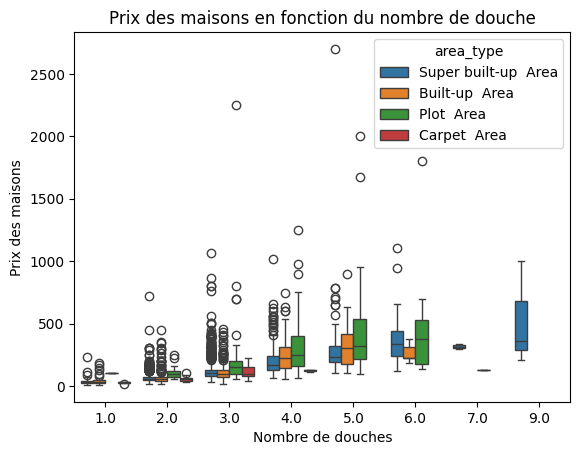

In [311]:
sns.boxplot(y="price",x="bath",hue = "area_type",data = bd)
plt.xlabel("Nombre de douches")
plt.ylabel("Prix des maisons")
plt.title("Prix des maisons en fonction du nombre de douche")
plt.show()

Ce boxplot nous montre la repartition des prix en fonction du nombre de douche et du type de zone

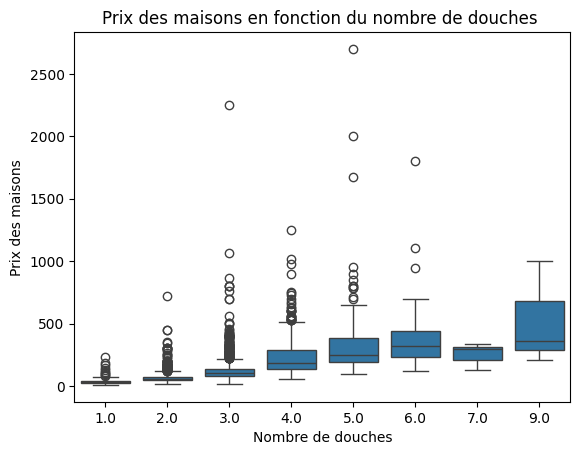

In [313]:
sns.boxplot(y="price",x="bath",data = bd)
plt.xlabel("Nombre de douches")
plt.ylabel("Prix des maisons")
plt.title("Prix des maisons en fonction du nombre de douches ")
plt.show()

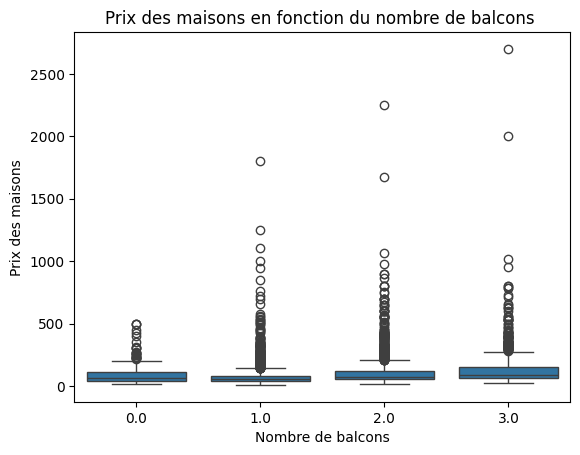

In [314]:
sns.boxplot(y="price",x="balcony",data = bd)
plt.xlabel("Nombre de balcons")
plt.ylabel("Prix des maisons")
plt.title("Prix des maisons en fonction du nombre de balcons ")
plt.show()

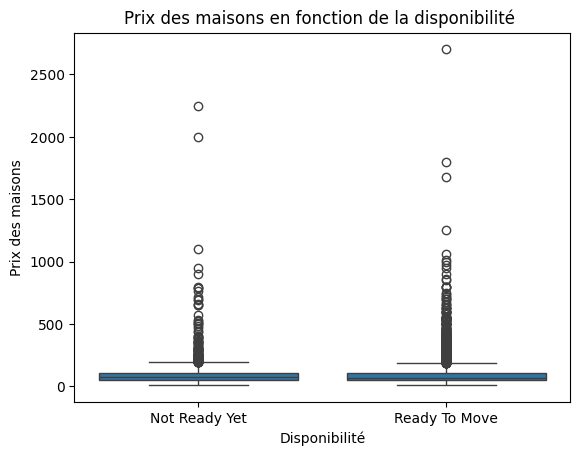

In [315]:
sns.boxplot(y="price",x="availability",data = bd)
plt.xlabel("Disponibilité")
plt.ylabel("Prix des maisons")
plt.title("Prix des maisons en fonction de la disponibilité ")
plt.show()

In [316]:
upper_limit = bd['price'].quantile(0.95)
upper_limit

251.19999999999982

In [317]:
# Filtrer les données pour éliminer les outliers
data_filtre = bd[bd['price'] <= upper_limit]

# Afficher les résultats
print(f'Original data size: {bd.shape[0]}')
print(f'Filtered data size: {data_filtre.shape[0]}')

Original data size: 7337
Filtered data size: 6970


In [318]:
data_filtre.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft       float64
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [319]:
#Conversion des données en binaire
data_final = pd.get_dummies(data_filtre, columns=['site_location', 'society', 'availability', 'area_type',"size"], drop_first=True,dtype = int)

In [320]:
bd.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,Not Ready Yet,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh
3,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,Balaji Nagar
4,Plot Area,Ready To Move,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,Bopodi


In [321]:
data_final.head()

,total_sqft,bath,balcony,price,site_location_Ambegaon Budruk,site_location_Anandnagar,site_location_Aundh,site_location_Aundh Road,site_location_Balaji Nagar,site_location_Baner,...,size_3 BHK,size_3 Bedroom,size_4 BHK,size_4 Bedroom,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_9 BHK
0,1056.0,2.0,1.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1521.0,3.0,1.0,95.00,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,1.0,38.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1000.0,2.0,1.0,38.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


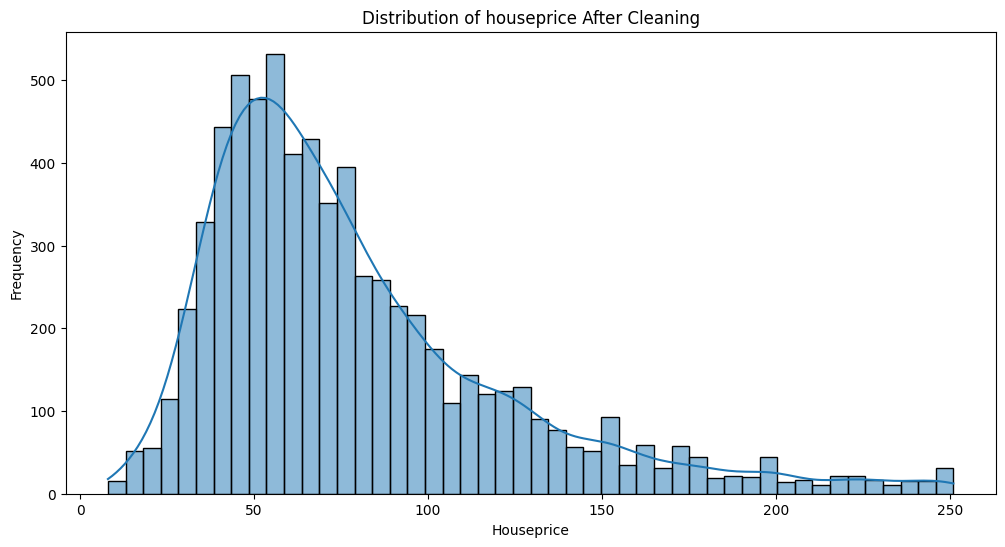

In [322]:
plt.figure(figsize=(12, 6))
sns.histplot(data_final['price'], kde=True)
plt.title('Distribution of houseprice After Cleaning')
plt.xlabel('Houseprice')
plt.ylabel('Frequency')
plt.show()

In [325]:
X = data_final[["total_sqft"]]
y = data_final["price"]

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
y

0        39.07
1       120.00
2        95.00
3        38.00
5        38.00
         ...  
7331    142.00
7332     57.00
7333    112.00
7334    231.00
7335     60.00
Name: price, Length: 6970, dtype: float64

In [328]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [329]:
# Afficher les coefficients
print("Coefficients:", model.coef_)

# Afficher l'interception
print("Intercept:", model.intercept_)

Coefficients: [0.04018464]
Intercept: 23.043730257928587


In [330]:
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


MSE: 962.6026828614337
R2 Score: 0.5089921942573343


"""Le R2 score nous montre qu'a elle seule, "total_sqft" explique la variance du prix des maisons
à 50%""" 

In [331]:
#Essayons de voir s'il existe une dépendance entre le prix des maisons,les balcons et les douches 
X2 = data_final[["bath","balcony"]]
y2 = data_final["price"]

In [332]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [333]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [334]:
# Afficher les coefficients
print("Coefficients:", model2.coef_)

# Afficher l'interception
print("Intercept:", model2.intercept_)

Coefficients: [40.51361099  1.25496795]
Intercept: -18.855793304455105


In [335]:
y2_pred = model2.predict(X2_test)
print('MSE:', mean_squared_error(y2_test, y2_pred))
print('R2 Score:', r2_score(y2_test, y2_pred))


MSE: 1038.1880358735702
R2 Score: 0.47043734812034677


"""Ici , les balcons et le nombre de douche explique la variation du prix des maisons à 47% 
avec un intrecept<0 """